### Exercise 1: Convert USD revenues to INR

<img src="revenue_usd.jpg"  width="400" />

### Solution 1 - Using dataframe for better visualization

In [119]:
# visualise the data in tabular form using pandas
import pandas as pd
revenue_data = {
    'Companies': ['Reliance', 'Infosys', 'TCS', 'Wipro'],
    'FY 2018': [200,68,110,80],
    'FY 2019': [220,79,140,85],
    'FY 2020': [250,105,180,90]
}
df = pd.DataFrame(revenue_data)
df

,Companies,FY 2018,FY 2019,FY 2020
0,Reliance,200,220,250
1,Infosys,68,79,105
2,TCS,110,140,180
3,Wipro,80,85,90


In [121]:
df1 = df.copy() # create a copy of the dataframe for backup

In [ ]:
# Conversion rate
inr_to_usd = 85  

# Convert all revenue columns to USD
df.iloc[:, 1:] = df.iloc[:, 1:] * inr_to_usd # Multiply all columns except the first one by the conversion rate
df

,Companies,FY 2018,FY 2019,FY 2020
0,Reliance,17000,18700,21250
1,Infosys,5780,6715,8925
2,TCS,9350,11900,15300
3,Wipro,6800,7225,7650


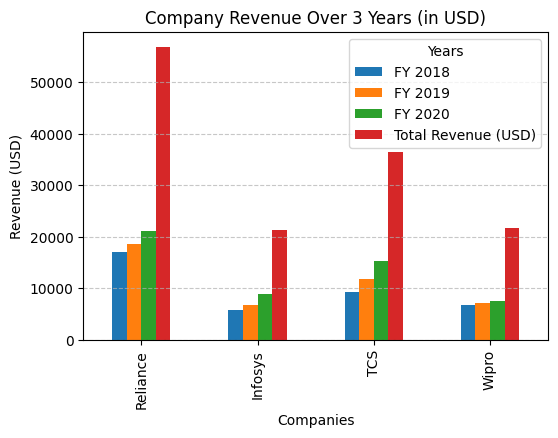

In [27]:
# Plot revenue over the years for each company in USD
import matplotlib.pyplot as plt
df.set_index('Companies').plot(kind='bar', figsize=(6,4))

plt.title("Company Revenue Over 3 Years (in USD)")
plt.xlabel("Companies")
plt.ylabel("Revenue (USD)")
plt.legend(title="Years")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [112]:
# Add total revenue in USD
df['Total Revenue (USD)'] = df.iloc[:, 1:].sum(axis=1)

# Display updated table
df

,Companies,FY 2018,FY 2019,FY 2020,Total Revenue (USD)
0,Reliance,17000,18700,21250,113900
1,Infosys,5780,6715,8925,42840
2,TCS,9350,11900,15300,73100
3,Wipro,6800,7225,7650,43350


### Solution 2 - Using numpy but have to tracke the individual row/column labels

In [ ]:
# Convert the df1 to numpy array, except the first column
import numpy as np
df1_array = df1.iloc[:,1:].values # Convert to numpy array, iLoc[]:,1] means all rows but columns all except first
df1_array

array([[200, 220, 250],
       [ 68,  79, 105],
       [110, 140, 180],
       [ 80,  85,  90]])

In [123]:
revenue_usd = df1_array * inr_to_usd
revenue_usd

array([[17000, 18700, 21250],
       [ 5780,  6715,  8925],
       [ 9350, 11900, 15300],
       [ 6800,  7225,  7650]])

Direct by defining numpy array

In [124]:
revenues_usd = np.array([[200,220,250],[68,79,105],[110,140,180],[80,85,90]])
revenues_inr = inr_to_usd * revenues_usd
revenues_inr

array([[17000, 18700, 21250],
       [ 5780,  6715,  8925],
       [ 9350, 11900, 15300],
       [ 6800,  7225,  7650]])

### Exercise 2: Calculate total flowers sale every month for divine flowers shop

<img src="flowers.jpg"  width="600" />

### Solution 1 : Using pandas


In [84]:
import pandas as pd

# Dataset 1: Units Sold per Month (Rows: Flowers, Columns: Months)
df_units_sold = pd.DataFrame({
    'Flower': ['Rose', 'Lotus', 'Sunflower'],
    'Jan': [50, 10, 40],
    'Feb': [60, 13, 70],  
    'Mar': [25, 5, 52]  
})

# Dataset 2: Price per Unit for Each Flower (Constant across months)
df_price_per_unit = pd.DataFrame({
    'Flower': ['Rose', 'Lotus', 'Sunflower'],
    'Price': [20, 30, 15]  # Price per unit in currency
})

# Display datasets
print("Units Sold Dataset:\n", df_units_sold)
print("\nPrice per Unit Dataset:\n", df_price_per_unit)

Units Sold Dataset:
       Flower  Jan  Feb  Mar
0       Rose   50   60   25
1      Lotus   10   13    5
2  Sunflower   40   70   52

Price per Unit Dataset:
       Flower  Price
0       Rose     20
1      Lotus     30
2  Sunflower     15


In [99]:
# Using numpy
import numpy as np

# Convert units_sold (without 'Flower' column) to NumPy array
units_sold = df_units_sold.iloc[:, 1:].values  # Shape (3,3)

# Convert price DataFrame to NumPy array for fast calculations
price_per_unit = df_price_per_unit.set_index('Flower')['Price'].values  # Shape: (3,)


print("Units Sold Array:\n", units_sold)
print("\nPrice Array:\n", price_per_unit)


Units Sold Array:
 [[50 60 25]
 [10 13  5]
 [40 70 52]]

Price Array:
 [20 30 15]


In [101]:
# Compute sales using dot product
sales_values = np.dot(price_per_unit, units_sold)  # Matrix multiplication
sales_values

array([1900, 2640, 1430])

In [107]:
# Convert sales_values into a DataFrame with same structure
sales_df = pd.DataFrame([sales_values], columns=df_units_sold.columns[1:])
sales_df.insert(0, 'Flower', ['Total Sales'])  # Add label for clarity
sales_df

,Flower,Jan,Feb,Mar
0,Total Sales,1900,2640,1430


Text(0.5, 1.0, 'Total Sales per Month')

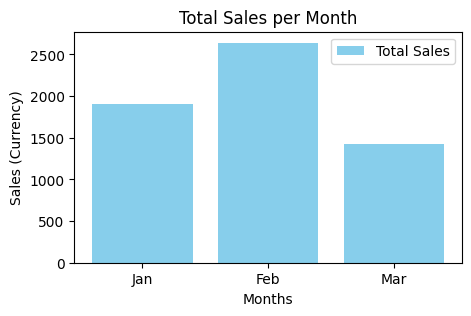

In [111]:
# Plot total sales per month
from matplotlib import pyplot as plt
plt.figure(figsize=(5,3))
plt.bar(sales_df.columns[1:], sales_values, color='skyblue')
plt.legend(['Total Sales'])
plt.xlabel("Months")
plt.ylabel("Sales (Currency)")
plt.title("Total Sales per Month")

### Solution 2 - Using numpy 
direct assign into the numpy array and apply dot product
 - but the drawback here is we can't see which company or month the value belongs to

In [92]:
units_sold = np.array([[50,60,25],[10,13,5],[40,70,52]])
price_per_unit = np.array([20,30,15])

In [93]:
print("Units Sold Array:\n", units_sold)
print("\nPrice Array:\n", price_per_unit)

Units Sold Array:
 [[50 60 25]
 [10 13  5]
 [40 70 52]]

Price Array:
 [20 30 15]


In [103]:
total_sales_amount = np.dot(price_per_unit,units_sold)
total_sales_amount

array([1900, 2640, 1430])